In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = "D:/IB/Telemedycyna/projekt-telemed/20_1/Accelerometer.csv"
acc = pd.read_csv(path)

acc.head()

,time,seconds_elapsed,z,y,x
0,1713358288924339000,0.158339,2.151008,-1.430554,0.840276
1,1713358288934318000,0.168318,2.676210,-1.983189,1.206598
2,1713358288944297500,0.178297,2.017565,-1.668046,1.305245
3,1713358288954276600,0.188277,1.058722,-1.276414,1.253136
4,1713358288964256000,0.198256,0.719764,-0.627776,1.381824


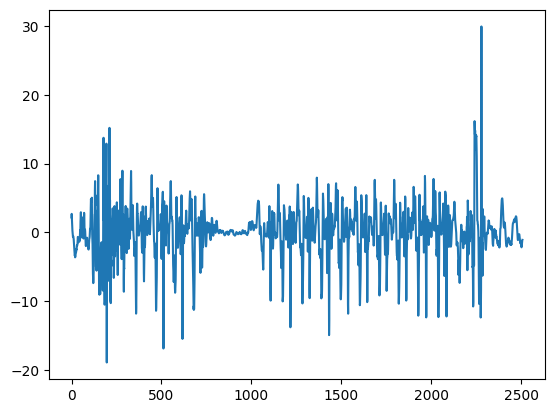

In [59]:
time = acc['time'].values
x = acc['x'].values
y = acc['y'].values
z = acc['z'].values

#z tego wykresu można wybrać jakie wartości z osi x nas interesują
plt.plot(z)

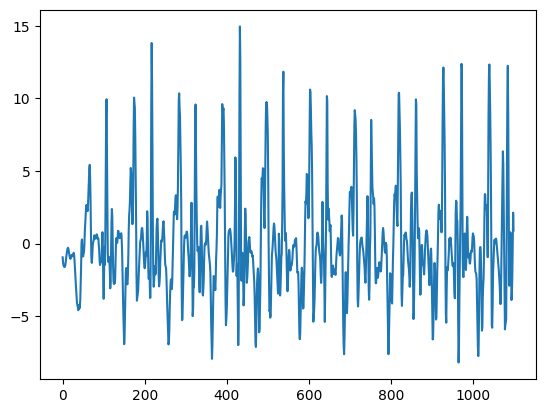

In [46]:
z2 = z[1000:2100]
t2 = time[1000:2100]
z2 = -z2
plt.plot(z2)

Liczba kroków przed filtracją:  20


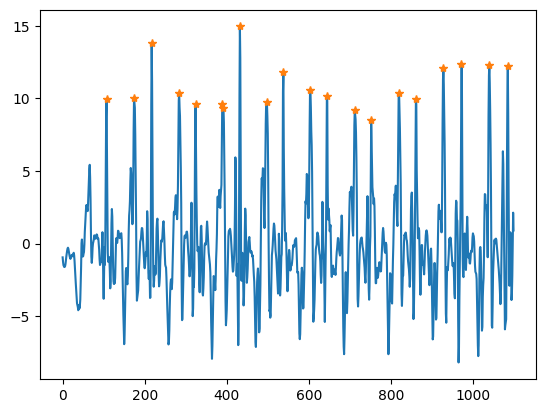

In [60]:
from scipy.signal import find_peaks

meanz2 = np.mean(z2)
devz2 = np.std(z2)

peaksz2, _ = find_peaks(z2, height=meanz2+2*devz2)
print("Liczba kroków przed filtracją: ", len(peaksz2),)
plt.plot(z2)
plt.plot(peaksz2, z2[peaksz2], "*")

Text(0.5, 1.0, "Wartości 'z' w domenie częstotliwości")

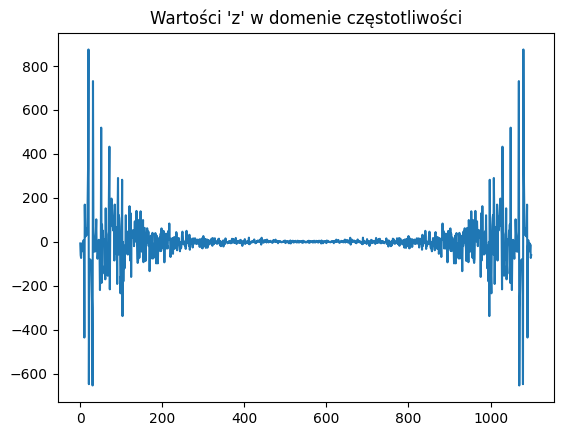

In [69]:
Fs = 1000
fft_z = np.fft.fft(z2)

#z tego wykresu wybieramy jakie częstotliwości są zakłóceniami
plt.plot(fft_z)
plt.title("Wartości 'z' w domenie częstotliwości")

Text(0.5, 1.0, "Sygnał 'z' po filtracji")

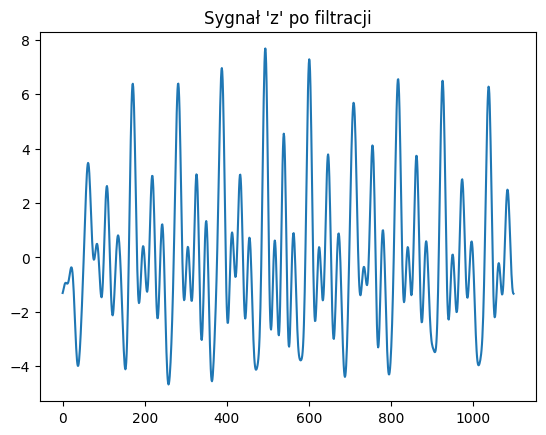

In [67]:
Fs = 1000
fft_z = np.fft.fft(z2)
f = np.fft.fftfreq(len(t2), 1/Fs)

fft_sygnal_filtr = fft_z.copy()

maska = (np.abs(f) > 50)
fft_sygnal_filtr[maska] = 0


z_filtered = np.fft.ifft(fft_sygnal_filtr)

plt.plot(z_filtered)
plt.title("Sygnał 'z' po filtracji")

Wyznaczona liczba kroków po filtracji:  18


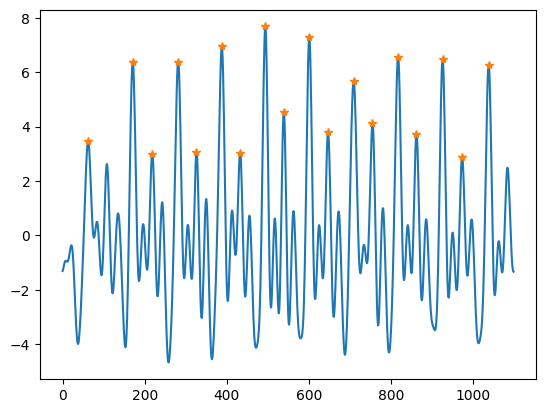

In [74]:
mean = np.mean(z_filtered)
dev = np.std(z_filtered)
#nagrane zostało 20 kroków

step_num, _ = find_peaks(z_filtered, height=mean+dev)
print("Wyznaczona liczba kroków po filtracji: ", len(step_num))


plt.plot(z_filtered)
plt.plot(step_num, z_filtered[step_num], "*")